# Visuals for final project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


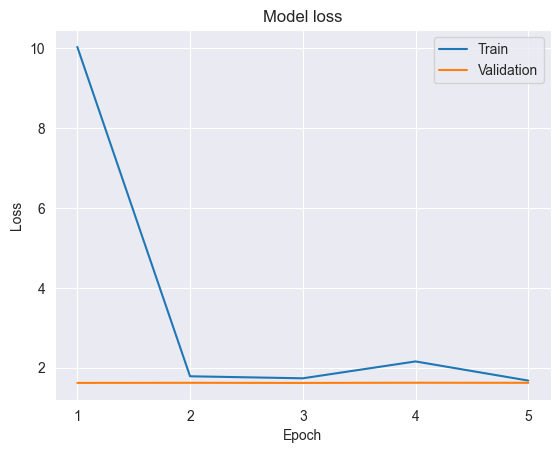

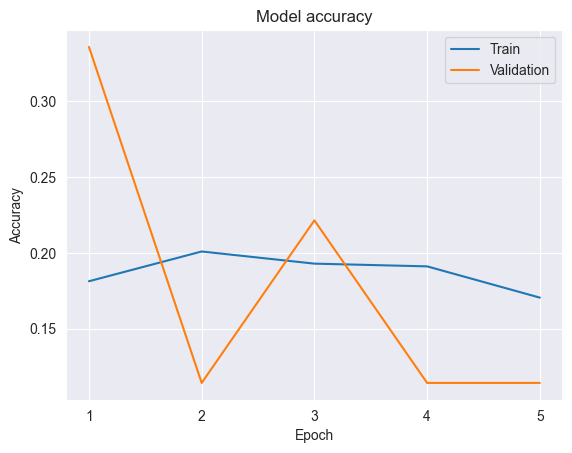

In [27]:
# Plot data from first CNN attempt
loss_values = [10.0389, 1.7865, 1.7359, 2.1585, 1.6788]
accuracy_values = [0.1813, 0.2009, 0.1929, 0.1911, 0.1705]
val_loss_values = [1.6208, 1.6232, 1.6202, 1.6249, 1.6227]
val_accuracy_values = [0.3357, 0.1143, 0.2214, 0.1143, 0.1143]

plt.plot(loss_values)
plt.plot(val_loss_values)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('CNN_1_loss.png')
plt.show()

# Plot training & validation accuracy values
plt.plot(accuracy_values)
plt.plot(val_accuracy_values)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('CNN_1_accuracy.png')
plt.show()

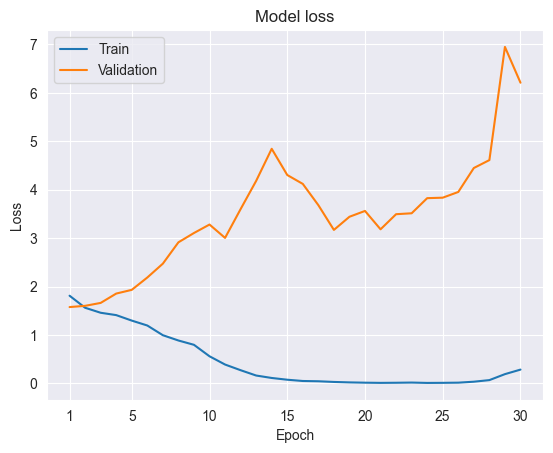

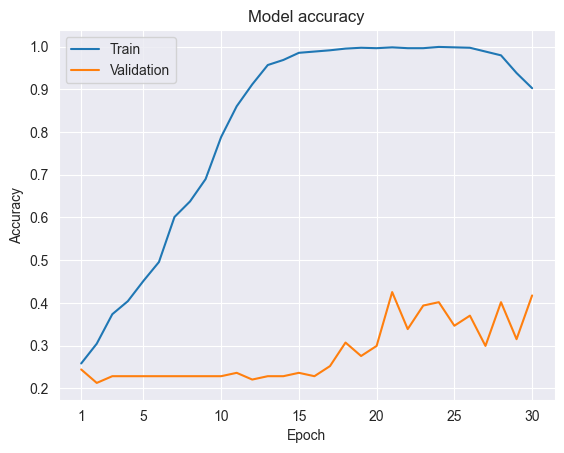

In [26]:
# Load accuracy/loss data from files exported during second CNN attempt
model_history = np.load('model_history.npz')
# Extract the arrays from the loaded data
accuracy = model_history['accuracy']
val_accuracy = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']
model_history.close()

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks([0,4,9,14,19,24,29], [1,5,10,15,20,25,30])
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN_2_loss.png')
plt.show()

# Plot training & validation accuracy values
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([0,4,9,14,19,24,29], [1,5,10,15,20,25,30])
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN_2_accuracy.png')
plt.show()

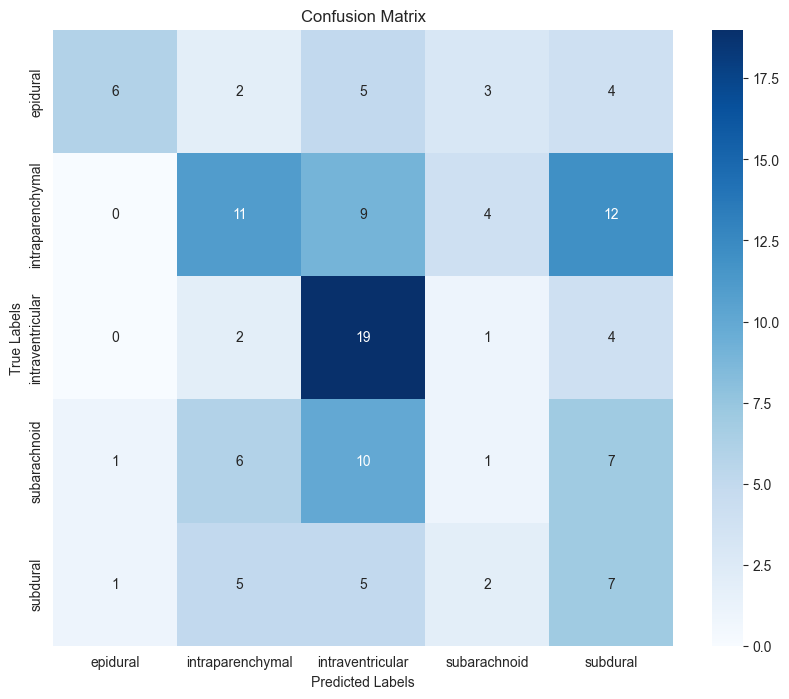

In [22]:
# Load results data
results = np.load('model_results.npz')

# Extract the arrays from the loaded data
y_pred = results['y_pred']
y_true = results['y_true']
y_pred_vals = np.argmax(y_pred, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_vals)

class_names = [
    'epidural',
    'intraparenchymal',
    'intraventricular',
    'subarachnoid',
    'subdural'
]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('CNN_2_confusion.png')
plt.show()

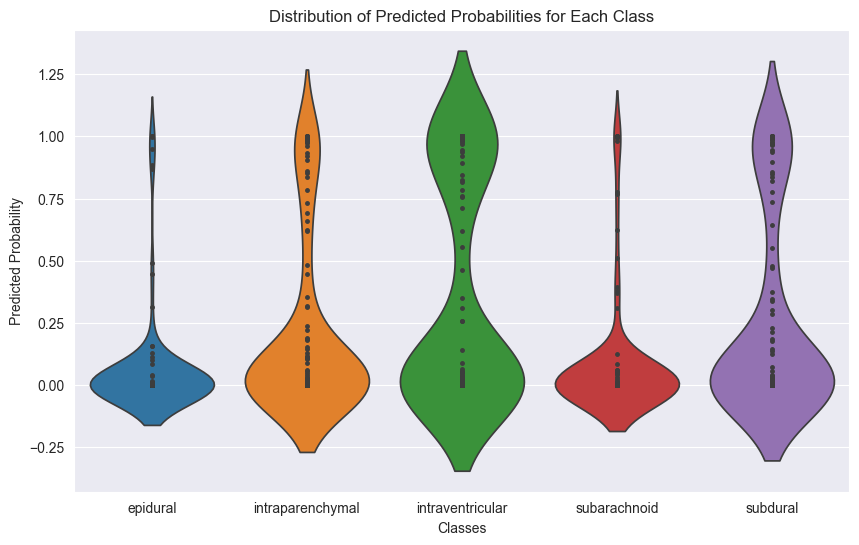

In [19]:
# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=y_pred, inner="points")
plt.xlabel('Classes')
plt.ylabel('Predicted Probability')
plt.title('Distribution of Predicted Probabilities for Each Class')
plt.xticks(ticks=np.arange(len(y_pred[0])), labels=class_names)
plt.savefig('CNN_2_violin.png')
plt.show()